# Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataset

In [3]:
df=pd.read_csv('http://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Relation between target varianle and independent variable

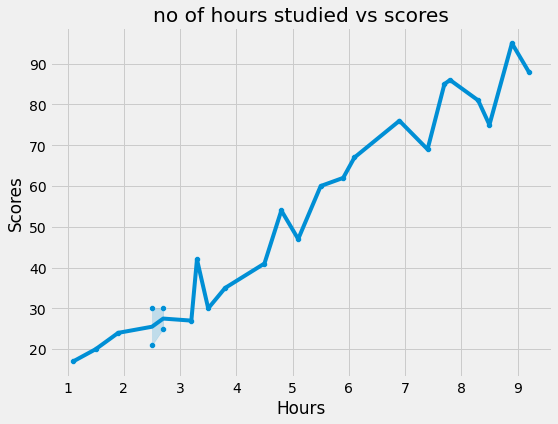

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Hours'],y=df['Scores'])
sns.lineplot(x=df['Hours'],y=df['Scores'])
plt.title('no of hours studied vs scores')
plt.show()

no of study hours increases scores also increasing, but it is not linear as there is some points where eventhough the study hours high the scores are coming down,it may be some other reason,we need some other predictors to know what exctly happening

# Preparing data

In [86]:
x=df[['Hours']]
y=df['Scores']

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [88]:
print('xtrain',x_train.shape)
print('xtest',x_test.shape)
print('ytrain',y_train.shape)
print('ytest',y_test.shape)

xtrain (20, 1)
xtest (5, 1)
ytrain (20,)
ytest (5,)


# Linear model

Fit linear model

In [89]:
lr=LinearRegression()

In [90]:
lr.fit(x_train,y_train)

LinearRegression()

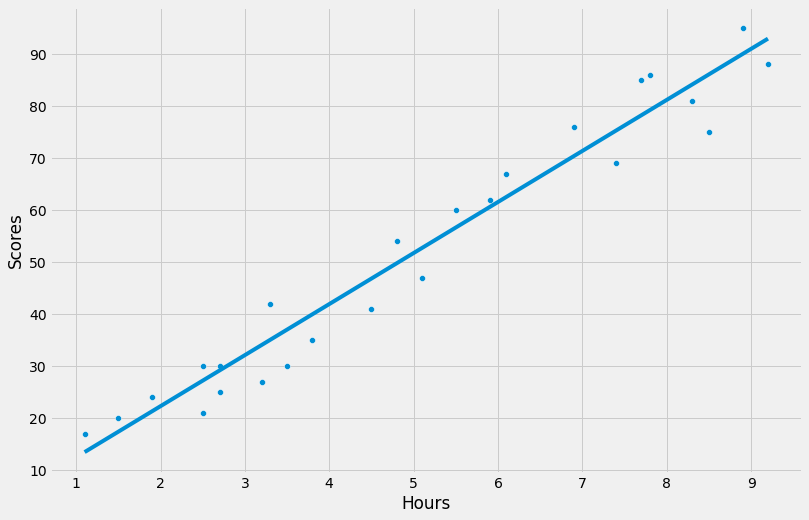

In [91]:
plt.figure(figsize=(12,8))
reg_line=lr.intercept_+(lr.coef_*df['Hours'])
sns.scatterplot(x=df['Hours'],y=df['Scores'])
sns.lineplot(x=df['Hours'],y=reg_line)
plt.show()

Predict 

In [92]:
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

In [93]:
#comparing actual and predicted values
pd.DataFrame({'actual':y_test,'predicted':test_pred})

,actual,predicted
5,20,17.371423
1,47,52.702923
13,42,35.037173
2,27,34.055743
12,41,46.814340


Model evaluation rmse score

In [94]:
print('train rmse',mean_squared_error(y_train,train_pred,squared=False))
print('test rmse',mean_squared_error(y_test,test_pred,squared=False))

train rmse 5.263165037962429
test rmse 5.856684262506168


test sample prediction

In [64]:
x=df[['Hours']]
y=df['Scores']

In [65]:
lr.fit(x,y)

LinearRegression()

In [66]:
test=np.array(9.25).reshape(-1,1)

In [67]:
test=lr.predict(test)

In [68]:
print('the predicted score if a student studies for 9.25 hrs/day  ',np.around(test,2))

the predicted score if a student studies for 9.25 hrs/day   [92.91]
